## 이미지에 가우시안 직선 그리기

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pdb

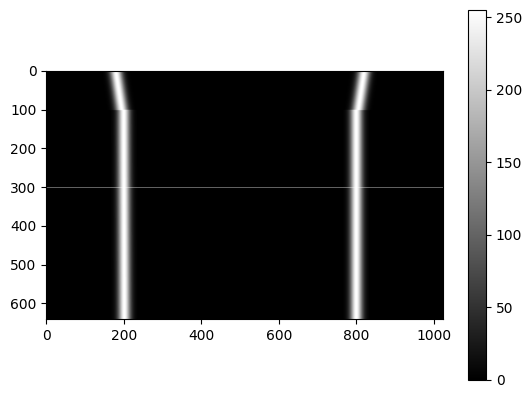

In [5]:
class DrawLine:
    def __init__(self, lines, sigma=7, imsize=(512, 512)):
        self.lines = lines
        self.height, self.width = imsize
        self.sigma = sigma
        self.img = np.zeros((self.height, self.width), dtype=np.float32)

        for line in lines:
            self.draw_line(*line)

    def draw_line(self, x0, y0, x1, y1):
        # 직선의 방정식을 구하기 위한 파라미터
        dx = x1 - x0
        dy = y1 - y0
        length = np.sqrt(dx**2 + dy**2)

        # 직선 범위 설정
        x_min, x_max = min(x0, x1), max(x0, x1)
        y_min, y_max = min(y0, y1), max(y0, y1)
        margin = int(3 * self.sigma)

        # 범위 내 픽셀을 검사하여 각 픽셀의 직선에 대한 거리를 계산
        #for y in range(y_min - margin, y_max + margin + 1):
        for y in range(y_min, y_max + 1):  # row
            for x in range(x_min - margin, x_max + margin + 1):  # col
                if 0 <= x < self.width and 0 <= y < self.height:  # 이미지 범위를 벗어나지 않도록
                    distance = abs(dy * x - dx * y + x1 * y0 - y1 * x0) / length
                    gaussian_value = 255 * np.exp(-(distance**2) / (2 * self.sigma**2))
                    self.img[y, x] = max(self.img[y, x], gaussian_value)

    def show_image(self):
        plt.imshow(self.img, cmap='gray')
        plt.colorbar()
        plt.show()


lines = [(180, 1, 195, 100), (200, 100, 202, 700), (800, 100, 800, 700), (820, 1, 805, 100)]
# hlines = [(1, 300, 1000, 300)]  # 수평에지, 수직에지를 따로 라벨링해서 margin을 다르게 적용
dline = DrawLine(lines, sigma=11, imsize=(640, 1024))
dline.show_image()

## 비디오에서 이미지 프레임 추출하기

In [25]:
#!pip install opencv-python

You should consider upgrading via the 'D:\2023\venv\nanogpt\Scripts\python.exe -m pip install --upgrade pip' command.



     --------------------------------------- 38.8/38.8 MB 11.7 MB/s eta 0:00:00


In [34]:
import cv2
import os

# 비디오 파일 경로 설정
video_path = 'img_4297.mov'
# 프레임을 저장할 디렉토리 설정
output_dir = 'out'
os.makedirs(output_dir, exist_ok=True)

# 비디오 캡쳐 객체 생성
cap = cv2.VideoCapture(video_path)

# 비디오 정보 추출
fps = cap.get(cv2.CAP_PROP_FPS)  # 초당 프레임 수
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))  # 총 프레임 수
duration = total_frames / fps  # 비디오 길이(초)

print(f"FPS: {fps}, Total Frames: {total_frames}, Duration: {duration}s")

FPS: 29.999612908220538, Total Frames: 3875, Duration: 129.16833333333335s


In [35]:
# 1초당 2장의 프레임을 추출하기 위한 간격 계산
frame_interval = int(fps / 2)

frame_count = 0
extracted_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        break
    
    if frame_count % frame_interval == 0:
        frame_time = frame_count / fps
        
        # 프레임을 세로로 3등분
        height, width, _ = frame.shape
        height_third = height // 3
        
        for i in range(3):
            start_y = i * height_third
            end_y = (i + 1) * height_third if i < 2 else height
            frame_part = frame[start_y:end_y, :]
            output_path = os.path.join(output_dir, f'frame_{extracted_count:04d}_part_{i+1}_time_{frame_time:.2f}.jpg')
            cv2.imwrite(output_path, frame_part)
            print(f"Extracted frame part {i+1} at {frame_time:.2f}s -> {output_path}")
        
        extracted_count += 1
    
    frame_count += 1

cap.release()
cv2.destroyAllWindows()

print("Frame extraction completed.")

Extracted frame part 1 at 0.00s -> out\frame_0000_part_1_time_0.00.jpg
Extracted frame part 2 at 0.00s -> out\frame_0000_part_2_time_0.00.jpg
Extracted frame part 3 at 0.00s -> out\frame_0000_part_3_time_0.00.jpg
Extracted frame part 1 at 0.47s -> out\frame_0001_part_1_time_0.47.jpg
Extracted frame part 2 at 0.47s -> out\frame_0001_part_2_time_0.47.jpg
Extracted frame part 3 at 0.47s -> out\frame_0001_part_3_time_0.47.jpg
Extracted frame part 1 at 0.93s -> out\frame_0002_part_1_time_0.93.jpg
Extracted frame part 2 at 0.93s -> out\frame_0002_part_2_time_0.93.jpg
Extracted frame part 3 at 0.93s -> out\frame_0002_part_3_time_0.93.jpg
Extracted frame part 1 at 1.40s -> out\frame_0003_part_1_time_1.40.jpg
Extracted frame part 2 at 1.40s -> out\frame_0003_part_2_time_1.40.jpg
Extracted frame part 3 at 1.40s -> out\frame_0003_part_3_time_1.40.jpg
Extracted frame part 1 at 1.87s -> out\frame_0004_part_1_time_1.87.jpg
Extracted frame part 2 at 1.87s -> out\frame_0004_part_2_time_1.87.jpg
Extrac